In [1]:
!pip install tensorflow

In [2]:
# Importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:/TMLC/Patient survival DL1/Dataset/Dataset.csv")
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


# # Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [6]:
df.shape

(91713, 186)

In [7]:
#checking missing values
df.isnull().any().sum()

175

In [8]:
df.isnull().sum().sort_values(ascending = True)

encounter_id            0
pre_icu_los_days        0
icu_type                0
icu_stay_type           0
icu_id                  0
                    ...  
h1_albumin_min      83824
h1_lactate_min      84369
h1_lactate_max      84369
h1_bilirubin_max    84619
h1_bilirubin_min    84619
Length: 186, dtype: int64

In [9]:
# statistical measures about the data
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# checking the distribution of Target Varibale
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [11]:
df.groupby('hospital_death').mean()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,,,
0,65666.975501,65480.459629,105.693501,61.748741,29.264902,0.194873,169.706029,508.287716,0.787357,0.0,...,0.062882,0.024799,0.000818,0.014188,0.227215,0.011639,0.024012,0.006301,0.003763,0.018409
1,64961.356412,66137.129754,105.412634,68.494156,28.340398,0.065824,168.952094,509.098547,1.348287,0.0,...,0.334838,0.242726,0.001277,0.031673,0.203704,0.027331,0.049042,0.015198,0.008046,0.044317


<AxesSubplot:xlabel='hospital_death', ylabel='count'>

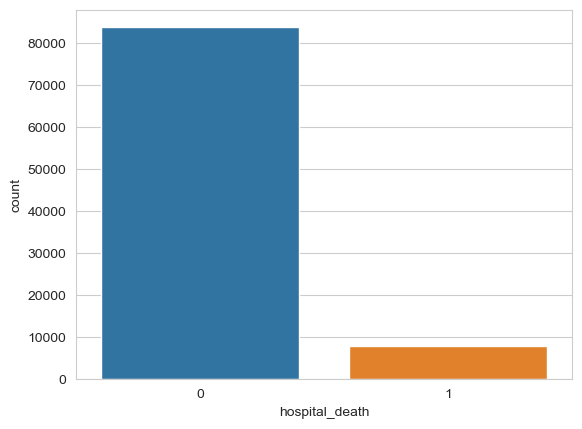

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='hospital_death',data=df)

In [13]:
object_columns = df.select_dtypes(include=['object']).columns

In [14]:
object_columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [15]:
cols = df.select_dtypes([np.number]).columns
cols

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days',
       ...
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis'],
      dtype='object', length=178)

<AxesSubplot:xlabel='hospital_death', ylabel='Density'>

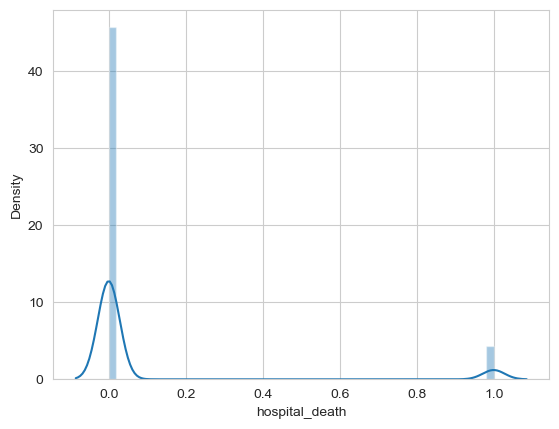

In [16]:
### Checking Outliers
sns.distplot(df['hospital_death']) 

<AxesSubplot:xlabel='hepatic_failure', ylabel='Density'>

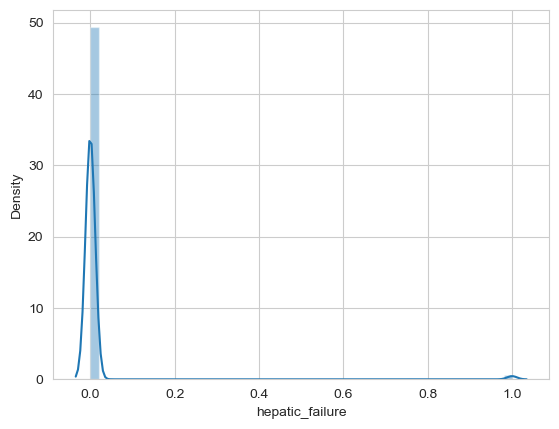

In [17]:
sns.distplot(df['hepatic_failure']) 

<AxesSubplot:xlabel='solid_tumor_with_metastasis', ylabel='Density'>

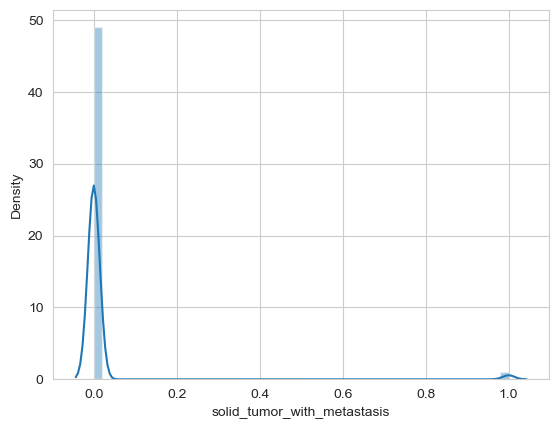

In [18]:
sns.distplot(df['solid_tumor_with_metastasis']) 

### Filling missing values 
### Catgorical variables with mode and Numerical variables with mean

In [19]:
df[cols] = df[cols].fillna(df[cols].mean())
df[cols]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.000000,22.730000,0,180.3,92,0.541667,...,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.000000,27.420000,0,160.0,90,0.927778,...,0.470000,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,0,25.000000,31.950000,0,172.7,93,0.000694,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.000000,22.640000,1,165.1,92,0.000694,...,0.040000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.000000,29.185818,0,188.0,91,0.073611,...,0.086787,0.043955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.000000,23.060250,0,177.8,927,0.298611,...,0.120000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,66119,13486,121,0,56.000000,47.179671,0,183.0,925,0.120139,...,0.030000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,8981,58179,195,0,48.000000,27.236914,0,170.2,908,0.046528,...,0.050000,0.020000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,33776,120598,66,0,62.309516,23.297481,0,154.9,922,0.081944,...,0.070000,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']
for i in object_columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
    print(i)

ethnicity
gender
hospital_admit_source
icu_admit_source
icu_stay_type
icu_type
apache_3j_bodysystem
apache_2_bodysystem


In [21]:
df.isnull().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 186, dtype: int64

In [22]:
df.isnull().any().sum()

0

### Encoding Concept 

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']

# Encode labels of multiple columns at once

df[object_columns] = df[object_columns].apply(le.fit_transform)

df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,2,1,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,0,77.0,27.420000,0,2,0,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,0,25.0,31.950000,0,2,0,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,0,81.0,22.640000,1,2,0,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,92056,34377,33,0,19.0,29.185818,0,2,1,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int32(8), int64(8)
memory usage: 127.3 MB


### Building a Model

In [25]:
X = df.drop(columns='hospital_death', axis=1)
Y = df['hospital_death']

In [26]:
X

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,68.000000,22.730000,0,2,1,180.3,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,77.000000,27.420000,0,2,0,160.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,119783,50777,118,25.000000,31.950000,0,2,0,172.7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,79267,46918,118,81.000000,22.640000,1,2,0,165.1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,92056,34377,33,19.000000,29.185818,0,2,1,188.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.000000,23.060250,0,2,1,177.8,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0
91709,66119,13486,121,56.000000,47.179671,0,2,0,183.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
91710,8981,58179,195,48.000000,27.236914,0,2,1,170.2,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3
91711,33776,120598,66,62.309516,23.297481,0,2,0,154.9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6


In [27]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91713, dtype: int64

### Splitting the data into training data & Testing data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(91713, 185) (73370, 185) (18343, 185)


### Feature selection

In [30]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.        , 0.00042234, 0.00411638, 0.00634018, 0.0007113 ,
       0.00571967, 0.01078975, 0.00374605, 0.00059152, 0.0087992 ,
       0.00633238, 0.00832237, 0.        , 0.00610601, 0.00369804,
       0.        , 0.00109186, 0.01441631, 0.0351077 , 0.03890243,
       0.00458876, 0.00152107, 0.01341726, 0.0180671 , 0.01631841,
       0.02608036, 0.03517755, 0.03990707, 0.00018931, 0.03510139,
       0.0065635 , 0.01302584, 0.00356303, 0.01104885, 0.01924033,
       0.02558426, 0.02528471, 0.02845434, 0.02902352, 0.00611372,
       0.00678731, 0.02057527, 0.01130513, 0.02667201, 0.01023669,
       0.01487054, 0.01663962, 0.0005047 , 0.01838468, 0.0014351 ,
       0.01882446, 0.01307217, 0.01516251, 0.0114074 , 0.01671073,
       0.0036592 , 0.02409157, 0.00375907, 0.02251228, 0.00920675,
       0.00987884, 0.01170273, 0.02370681, 0.01560176, 0.01925632,
       0.00313069, 0.02693465, 0.00375772, 0.02576238, 0.01671545,
       0.01996503, 0.01489923, 0.00912646, 0.00234096, 0.01091

In [31]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

apache_4a_hospital_death_prob    0.074317
apache_4a_icu_death_prob         0.072869
d1_lactate_min                   0.041819
gcs_motor_apache                 0.039907
apache_3j_diagnosis              0.038902
                                   ...   
aids                             0.000000
lymphoma                         0.000000
icu_stay_type                    0.000000
readmission_status               0.000000
encounter_id                     0.000000
Length: 185, dtype: float64

<AxesSubplot:>

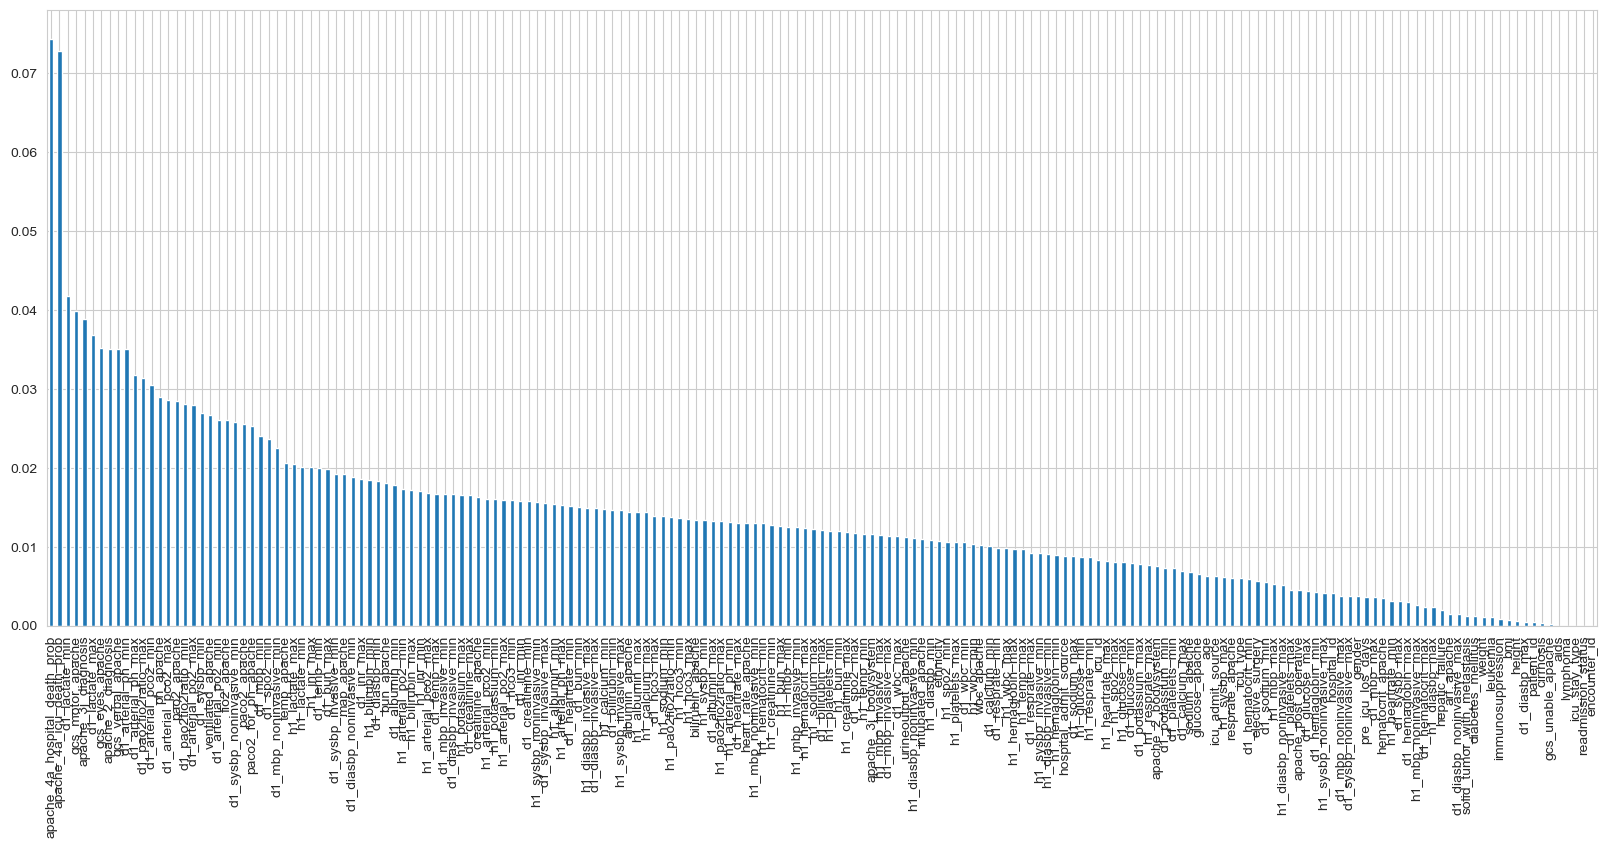

In [32]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [33]:
from sklearn.feature_selection import SelectKBest

In [34]:
#Now we Will select the top six important features
sel_six_cols = SelectKBest(mutual_info_classif, k=6)
sel_six_cols.fit(X_train, Y_train)
X_train.columns[sel_six_cols.get_support()]

Index(['apache_3j_diagnosis', 'gcs_motor_apache', 'd1_lactate_max',
       'd1_lactate_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob'],
      dtype='object')

In [35]:
X_train_new = sel_six_cols.transform(X_train)
X_test_new =  sel_six_cols.transform(X_test)

### Standardize the data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [38]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
import tensorflow as tf
#Compile the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [40]:
# fit the keras model on the dataset
history = model.fit(X_train_std, Y_train, epochs=20, validation_split=0.2,batch_size=10)



Epoch 1/20
5870/5870 [==============================] - 19s 3ms/step - loss: 0.2282 - accuracy: 0.9202 - precision: 0.6520 - recall: 0.2034 - val_loss: 0.2351 - val_accuracy: 0.9139 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
5870/5870 [==============================] - 18s 3ms/step - loss: 0.2225 - accuracy: 0.9210 - precision: 0.6646 - recall: 0.2113 - val_loss: 0.2174 - val_accuracy: 0.9231 - val_precision: 0.7500 - val_recall: 0.1591
Epoch 3/20
5870/5870 [==============================] - 18s 3ms/step - loss: 0.2231 - accuracy: 0.9203 - precision: 0.6477 - recall: 0.2105 - val_loss: 0.2167 - val_accuracy: 0.9225 - val_precision: 0.7386 - val_recall: 0.1544
Epoch 4/20
5870/5870 [==============================] - 18s 3ms/step - loss: 0.2231 - accuracy: 0.9214 - precision: 0.6697 - recall: 0.2158 - val_loss: 0.2209 - val_accuracy: 0.9204 - val_precision: 0.5639 - val_recall: 0.3317
Epoch 5/20
5870/5870 [==============================] - 18s 3ms/step - loss: 0.2222 

In [41]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_std, Y_test)
print('Accuracy: %.2f' % (accuracy*100))
_,precision = model.evaluate(X_test_std, Y_test)
print('Precision: %f' % precision)
_,recall = model.evaluate(X_test_std, Y_test)
print('Recall: %f' % recall)




574/574 [==============================] - 1s 2ms/step - loss: 0.2063 - accuracy: 0.9293 - precision: 0.7799 - recall: 0.1681


ValueError: too many values to unpack (expected 2)

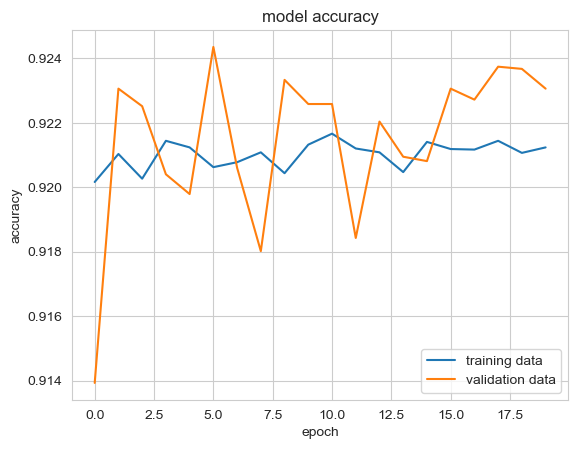

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

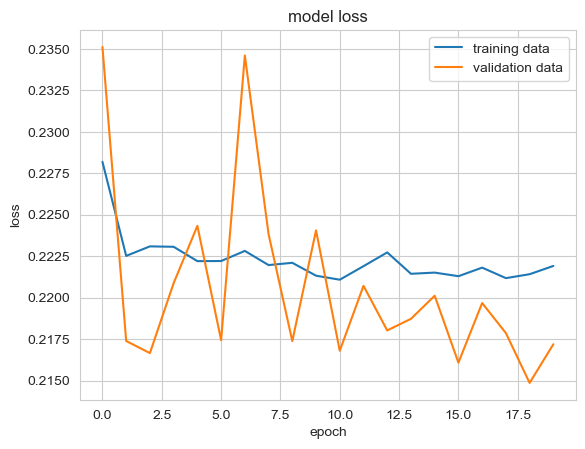

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [44]:
#saving the model
model.save('keras_model.h5')

In [45]:
#loading the model 
from keras.models import load_model
model = load_model('keras_model.h5')

In [46]:
print(sorted(X_test['apache_3j_diagnosis'].unique()))

[0.03, 0.04, 0.09, 0.11, 0.14, 0.18, 0.19, 0.2, 0.22, 0.23, 0.24, 0.25, 101.01, 102.01, 102.02, 103.01, 104.01, 105.01, 105.02, 106.01, 107.01, 108.01, 109.01, 109.02, 109.03, 109.04, 109.05, 109.06, 109.07, 109.08, 109.09, 109.1, 109.11, 109.12, 109.13, 109.14, 109.15, 109.16, 110.01, 111.01, 201.01, 202.01, 203.01, 204.01, 206.01, 207.01, 208.01, 209.01, 210.01, 210.02, 211.01, 211.02, 211.03, 211.04, 211.05, 211.06, 211.07, 211.08, 211.09, 211.1, 211.11, 211.12, 212.01, 212.02, 213.01, 301.01, 301.02, 301.03, 303.01, 305.01, 305.02, 306.01, 307.01, 307.02, 307.03, 307.04, 307.05, 308.01, 309.01, 310.01, 311.01, 312.01, 312.02, 312.03, 312.04, 312.05, 313.01, 313.02, 313.03, 313.04, 313.05, 401.01, 402.01, 402.02, 403.01, 404.01, 404.02, 404.03, 405.01, 406.01, 406.02, 406.03, 406.04, 407.01, 408.01, 408.02, 409.01, 409.02, 410.01, 501.01, 501.02, 501.03, 501.04, 501.05, 501.06, 502.01, 558.2163765284276, 601.01, 601.02, 601.03, 601.04, 601.05, 601.06, 601.07, 601.08, 602.01, 602.02,

In [47]:
print(sorted(X_test['gcs_motor_apache'].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 5.471195385917249, 6.0]


In [48]:
print(sorted(X_test['d1_lactate_max'].unique()))

[0.4, 0.5, 0.54, 0.56, 0.57, 0.59, 0.6, 0.61, 0.64, 0.68, 0.69, 0.7, 0.75, 0.77, 0.78, 0.8, 0.81, 0.82, 0.84, 0.85, 0.86, 0.87, 0.89, 0.9, 0.91, 0.92, 0.95, 0.96, 0.99, 1.0, 1.01, 1.02, 1.03, 1.05, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.3, 1.31, 1.33, 1.34, 1.35, 1.36, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.52, 1.53, 1.54, 1.55, 1.56, 1.58, 1.6, 1.61, 1.64, 1.65, 1.67, 1.7, 1.71, 1.72, 1.73, 1.75, 1.78, 1.79, 1.8, 1.82, 1.84, 1.85, 1.86, 1.87, 1.88, 1.9, 1.91, 1.92, 1.93, 1.94, 1.96, 1.99, 2.0, 2.01, 2.04, 2.05, 2.06, 2.08, 2.1, 2.11, 2.14, 2.17, 2.19, 2.2, 2.23, 2.25, 2.29, 2.3, 2.32, 2.34, 2.35, 2.36, 2.39, 2.4, 2.41, 2.44, 2.45, 2.47, 2.49, 2.5, 2.54, 2.58, 2.6, 2.62, 2.64, 2.7, 2.74, 2.77, 2.8, 2.82, 2.88, 2.9, 2.927382596388913, 2.98, 3.0, 3.03, 3.1, 3.11, 3.12, 3.13, 3.2, 3.25, 3.28, 3.3, 3.31, 3.32, 3.37, 3.4, 3.42, 3.43, 3.44, 3.5, 3.6, 3.63, 3.66, 3.67, 3.7, 3.72, 

# Explainable AI

In [50]:
import shap
shap.initjs()

In [52]:
X_sample =pd.DataFrame( X_train_new,columns = X_train.columns[sel_six_cols.get_support()]).sample(100)

In [63]:
X_sample

,apache_3j_diagnosis,d1_lactate_max,d1_lactate_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
52701,501.02,2.927383,2.125128,0.22,0.13
18035,208.01,2.927383,2.125128,0.03,0.01
57209,108.01,1.700000,1.700000,0.01,0.00
45659,704.01,2.927383,2.125128,0.01,0.01
76917,102.01,2.927383,2.125128,0.77,0.60
...,...,...,...,...,...
36054,901.01,2.927383,2.125128,-1.00,-1.00
51308,501.05,1.900000,1.900000,0.12,0.08
52390,1404.01,2.927383,2.125128,0.15,0.06
34554,211.09,2.927383,2.125128,0.07,0.02


In [53]:
explainer = shap.KernelExplainer(model.predict,X_train_new)

2293/2293 [==============================] - 5s 2ms/step


In [ ]:
shap_values = explainer.shap_values(X_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

128372/142155 [==========================>...] - ETA: 25s

In [ ]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [ ]:
###force plot
shap.force_plot(explainer.expected_value[0], shap_values[0], features = X_sample)

In [ ]:
shap.summary_plot(shap_values[0], features = X_sample)